# Project Introduction:
Primer laboratorio de aprendizaje automático, desarrollado por Sergio Barragán Blanco (100472343) y Eduardo Alarcón Navarro (100472175). 
Grupo 17.


# 1. EDA
Existen 22 carácterísticas que definen cada momento, de las cuales ninguna es categórica, todas son numéricas (con la energía suman 23). No existen valores faltantes, pero si los hubiera, los rellenaríamos con la media del valor superior e inferior.

No existen tampoco columnas constantes, que se eliminarían. 

Con todo esto, podemos observar que es un problema de regresión.

La variable que estamos intentando predecir es la "energía" que es el valor de la energía generada 24 horas después. 

Por lo tanto, vamos a comenzar con todos los imports necesarios para este proyecto

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer, PowerTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, TimeSeriesSplit, cross_val_score
from sklearn.tree import DecisionTreeRegressor  
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from joblib import dump, load






Posteriormente cargamos el dataset de wind_ava.csv, y eliminamos todas las columnas a excepción de la energía y los datos que usaremos para predecirla (13)

In [2]:

# Load the data
data = pd.read_csv('wind_ava.csv.gz', compression='gzip')

# FIlter the data to only include the columns that end in 13
data = data.filter(regex='13$|energy')
#print(data)
print(data.head())
print("--------------------")



    energy    p54.162.13  p55.162.13    cape.13    p59.162.13  lai_lv.13  \
0   402.71  2.510824e+06    9.186295  13.527577  1.386937e+06   2.344111   
1   696.80  2.513173e+06    8.849569   6.896412  1.153526e+06   2.343719   
2  1591.15  2.509627e+06    7.924080   4.774439  1.098754e+06   2.343300   
3  1338.62  2.510571e+06    6.922709   0.000000  1.076021e+06   2.342830   
4   562.50  2.505664e+06    6.646282   0.000000  1.070830e+06   2.342437   

   lai_hv.13   u10n.13   v10n.13         sp.13  ...      t2m.13     stl2.13  \
0   2.432983 -0.757587 -1.922799  99846.319914  ...  280.473098  281.042026   
1   2.432838 -1.412620 -1.403011  99917.733093  ...  278.286616  280.747406   
2   2.432704 -2.290185 -0.754580  99764.378681  ...  277.206490  280.114863   
3   2.432514 -3.497855  1.271028  99672.670459  ...  280.926600  279.991138   
4   2.432369 -0.971249  0.553060  99372.811211  ...  277.363875  280.576898   

      stl3.13   iews.13   inss.13     stl4.13    fsr.13   flsr.13   

# Correlación:
## Correlaciones entre parámetros:
Al principio, parece que las columnas lai_lv.13 y lai_hv.13 tienen una correlación, pero según avanza el tiempo, desaparece.

## Escala de los datos
Entre las diferentes columnas de datos, tenemos valores y magnitudes muy dispares.

Para comprobar la posible correlación entre datos, hemos usado la librería de matplotlib para hacer una matriz de correlación:

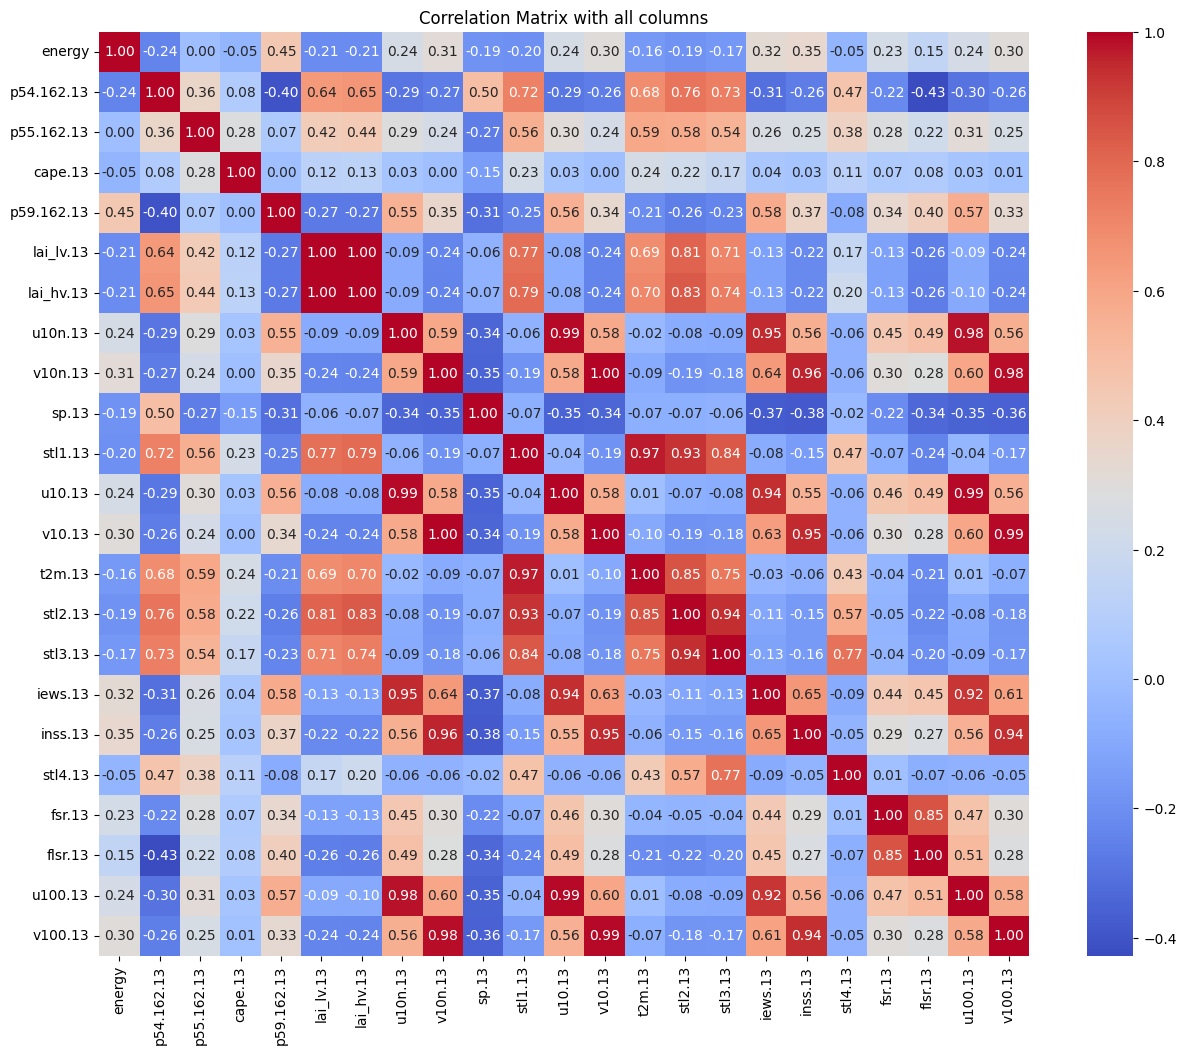

    energy    p54.162.13  p55.162.13    cape.13    p59.162.13  lai_lv.13  \
0   402.71  2.510824e+06    9.186295  13.527577  1.386937e+06   2.344111   
1   696.80  2.513173e+06    8.849569   6.896412  1.153526e+06   2.343719   
2  1591.15  2.509627e+06    7.924080   4.774439  1.098754e+06   2.343300   
3  1338.62  2.510571e+06    6.922709   0.000000  1.076021e+06   2.342830   
4   562.50  2.505664e+06    6.646282   0.000000  1.070830e+06   2.342437   

    u10n.13   v10n.13         sp.13     stl4.13    fsr.13   flsr.13  
0 -0.757587 -1.922799  99846.319914  284.684755  0.404731 -5.927092  
1 -1.412620 -1.403011  99917.733093  284.667948  0.404920 -5.913881  
2 -2.290185 -0.754580  99764.378681  284.651914  0.405704 -5.908272  
3 -3.497855  1.271028  99672.670459  284.636266  0.403967 -5.961995  
4 -0.971249  0.553060  99372.811211  284.620232  0.403808 -5.987860  


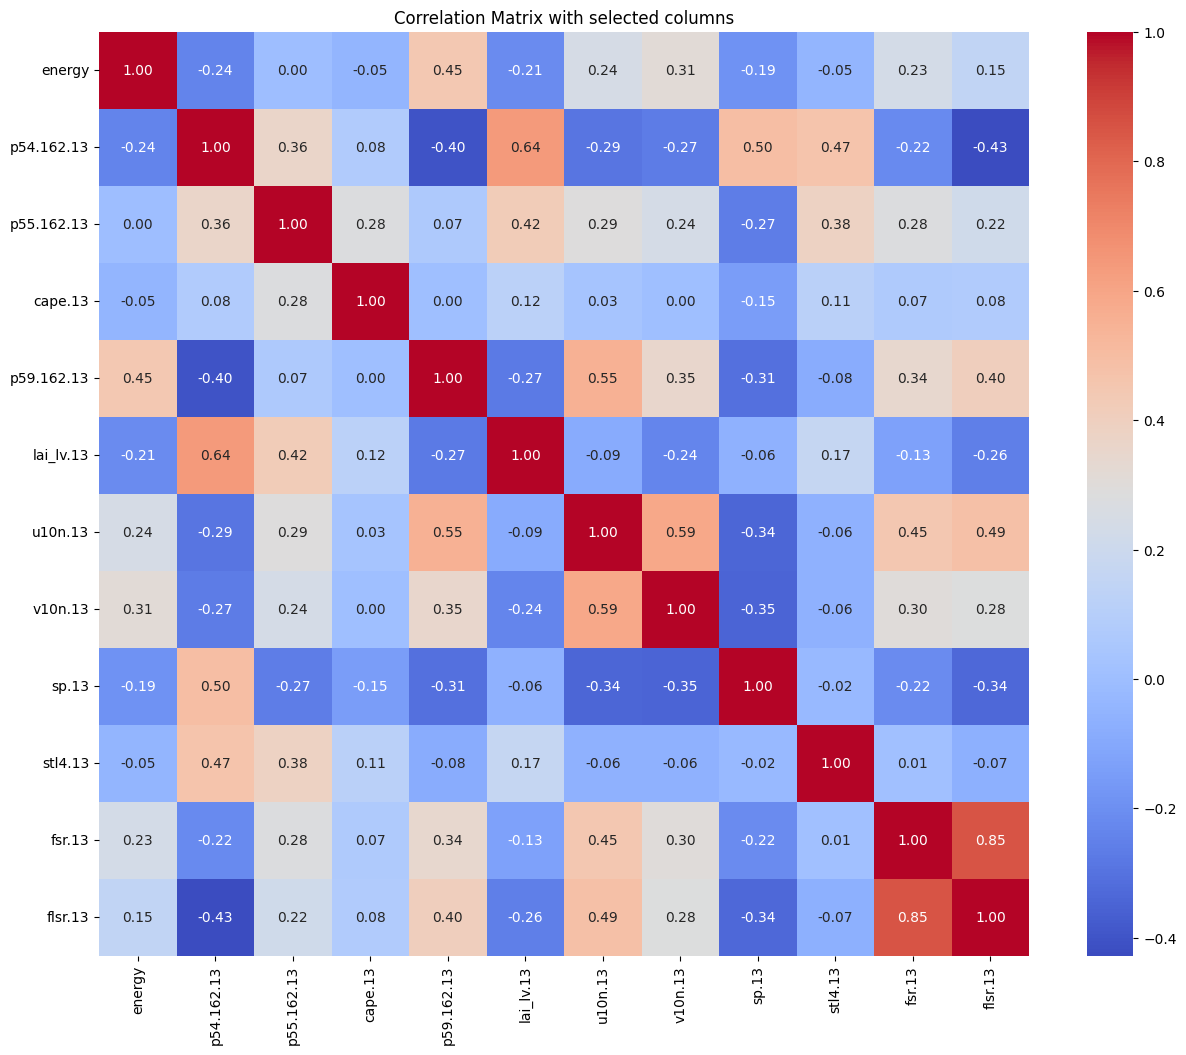

In [3]:
# Step 1: Load Data, done in the first cell

# Step 2: Calculate Correlation
correlation_matrix = data.corr()

# Step 3: Visualize Correlation Matrix
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix with all columns')
plt.show()


# Step 4: Filter out columns with correlation more than 0.9
# Al eliminar las columnas innecesarias, el modelo empeora en la predicción de la energía considerablemente.
data_filtered = data.drop(columns=['lai_hv.13', 'u10.13', 'v10.13', 'stl3.13',
                                    'iews.13', 'inss.13', 'u100.13', 'v100.13',
                                      't2m.13', 'stl1.13', 'stl2.13'])
print(data_filtered.head())

# Repeat Step 3: Visualize Correlation Matrix
correlation_matrix = data_filtered.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix with selected columns')
plt.show()



A pesar de que la matriz de correlación sea mucho mejor, no se pueden sacar conclusiones claras de ella. Sobre todo, porque al entrenar los modelos, vemos que son peores.

Depues de realizar las pruebas con los dos datasets, hemos visto que es mejor utilizar todos los datos,ya que los resultados so mucho mejores. Por lo que vamos a proceder a separar los datos de entrenamiento de los datos de entrenamiento y los datos de test, con train_test_split de la fuente de datos original.

In [4]:
y = data['energy']
X = data.drop(columns=['energy'])
print(X.head())

# test_size vamos a escoger 0.2 ya que tenemos datos en un rango de 5 años en orden (2015-2019) por lo que (asumiendo que el numero de datos para todos los años es similar) usaremos 2019 como test final.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
#print(f"Fechas de tain {train.iloc[0].datetime}-{train-iloc[-1].datetime}")

graph_data = {}

     p54.162.13  p55.162.13    cape.13    p59.162.13  lai_lv.13  lai_hv.13  \
0  2.510824e+06    9.186295  13.527577  1.386937e+06   2.344111   2.432983   
1  2.513173e+06    8.849569   6.896412  1.153526e+06   2.343719   2.432838   
2  2.509627e+06    7.924080   4.774439  1.098754e+06   2.343300   2.432704   
3  2.510571e+06    6.922709   0.000000  1.076021e+06   2.342830   2.432514   
4  2.505664e+06    6.646282   0.000000  1.070830e+06   2.342437   2.432369   

    u10n.13   v10n.13         sp.13     stl1.13  ...      t2m.13     stl2.13  \
0 -0.757587 -1.922799  99846.319914  280.960661  ...  280.473098  281.042026   
1 -1.412620 -1.403011  99917.733093  279.296651  ...  278.286616  280.747406   
2 -2.290185 -0.754580  99764.378681  278.233956  ...  277.206490  280.114863   
3 -3.497855  1.271028  99672.670459  280.787263  ...  280.926600  279.991138   
4 -0.971249  0.553060  99372.811211  279.583112  ...  277.363875  280.576898   

      stl3.13   iews.13   inss.13     stl4.13    f

# Comportamiento futuro
Para este ejercicio vamos a llevar a cabo evaluaciones inner de varios tipos de modelos, los cuales poseerán distintos hyperparámetros que iremos ajustando. Posteriormente, compararemos los modelos y haremos una gráfica para representar visualmente las diferencias, y al mejor modelo lo seleccionaremos para probarlo con el conjunto de datos de test. Por último, entrenaremos ese modelo nuevamente, pero en este caso con todos los datos (incluidos el test) para poder mejorar (aunque sea ligeramente), la predicción a futuro del wind_comp.csv

En cuanto a las métricas que se van a usar, la principal será la Root Mean Squeared Error (RMSE), ya que es una forma compacta de evaluar los modelos, además penaliza gravemente los fallos, y es mas legible que el Mean Squared Error (MSE)

# Decidir usando KNN - Scalers

A continuación, usaremos KNN para determinar el método de escalado más apropiado para el problema. 
Dado que no queremos entrenar con datos en el futuro, no podremos usar una validacin cruzada normal (usando Kfold o Shuffle), por lo que tendremos que usar predefined split o Time Series split (el cual es igual a una validación cruzada, pero ignora los posteriores a test), en nuestro caso, usaremos TimeSeriesSplit para todas las validaciones. En cuanto a los scalers, probaremos "StandardScaler", "MinMaxScaler", "RobustScaler", "Normalizer" y "PowerTransformer".


In [5]:
# First of all, the necessary scalers
scalers = [StandardScaler(), MinMaxScaler(), RobustScaler(), Normalizer(), PowerTransformer()]

# And we are going to store all the pipelines in order to test them later
pipelines = {}
for scaler in scalers:
    pipe = Pipeline([
        ('scaler', scaler),
        ('knn', KNeighborsRegressor())
    ])
    pipelines[str(scaler)[:-2]] = pipe

scores = {}
# Calculate the score for each scaler
for name, pipe in pipelines.items():
    scores[name] = -cross_val_score(pipe, X_train, y_train, cv=TimeSeriesSplit(), scoring='neg_root_mean_squared_error').mean()

# Print them all and compare which one is the best
for name, score in scores.items():
    print (f" {name}: {score}")

# Resultado con data sin filtrar
# StandardScaler: 455.56751873979965
# MinMaxScaler: 490.81263982750016
# RobustScaler: 454.0893589365546
# Normalizer: 644.0650360014222
# PowerTransformer: 428.29574620911944

# Resultado con data filtrada
# StandardScaler: 518.1803408987827
# MinMaxScaler: 538.7092117532035
# RobustScaler: 525.9490003734232
# Normalizer: 644.0650360014222
# PowerTransformer: 497.1992872267256

 StandardScaler: 455.56751873979965
 MinMaxScaler: 490.81263982750016
 RobustScaler: 454.0893589365546
 Normalizer: 644.0650360014222
 PowerTransformer: 428.29574620911944


/Users/edu/Documents/AA/.venv/lib/python3.12/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


# Entrenamiento de diferentes modelos
Lo próximo que haremos, será probar con diferentes métodos de entrenamiento (KNN, árboles de regresión, regresión lineal normal y la variante de Lasso, y SVM. Para elegir el mejor, usaremos la librería time para saber cuánto se tarda en entrenar cada modelo, un dummy para comparar resultados, y el mejor de entre ellos, usando una política de importancia de 10% a tiempo y 90% precisión.

Lo primero que vamos a usar es el DummyRegressor, para tener una representación visual del peor escenario posible y que tanto mejoran nuestros diseños.

Como el scaler que dió mejor scoring fué el PowerTransformer, será el que usaremos de ahora en adelante

In [6]:
# Create a Dummy regressor to obtain a baseline
scaler = PowerTransformer()

dummy = DummyRegressor(strategy='mean')
# We will use the previously mentioned scaler
pipe = Pipeline([
    ('scaler', scaler),
    ('model', dummy)
])
# Store the time so we can use it to compare every model
a = time.time()
# Train the model
pipe.fit(X_train, y_train)
b = time.time()
# We will use the training test to have a reference for the other models
y_pred = pipe.predict(X_test)

# But the later models will only be using the score with RMSE
mse_dummy = metrics.mean_squared_error(y_test, y_pred)
rmse_dummy = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print(f"MSE: {mse_dummy}")
print(f"RMSE: {rmse_dummy}")
print(f"Time taken to train the Dummy Model: {b-a} seconds")

graph_data["Dummy"] = [rmse_dummy, b-a]
# Resultado con data sin filtrar
# MSE: 439516.0127766374
# RMSE: 662.9600385970766
# Time taken to train the Dummy Model: 0.0872499942779541

# Resultado con data filtrada
# MSE: 439516.0127766374
# RMSE: 662.9600385970766
# Time taken to train the Dummy Model: 0.02886199951171875 seconds


MSE: 439516.0127766374
RMSE: 662.9600385970766
Time taken to train the Dummy Model: 0.051393985748291016 seconds


/Users/edu/Documents/AA/.venv/lib/python3.12/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


Para empezar, vamos a comparar con un **Decision Tree Regresor**. En vez de usar un Grid Search, usamos un RandomSearch porque es más rápido y para probar más combinaciones de hiperparámetros.

In [7]:
# DecisionTreeRegressor
# First of all is defining the parameters that will be used to train the model
param_grid = {
    'criterion': ['friedman_mse', 'absolute_error', 'poisson', 'squared_error'],  # Impurity criteria for regression
    'max_depth': [None, 10, 12, 13, 14, 15, 16, 17],  # Maximum depth of the tree
    'min_samples_split': range(2, 15, 2),  # Minimum number of samples to split an internal node
    'min_samples_leaf': range(10, 20, 2),  # Minimum number of samples in a leaf node
}
# Then, since we are doing a inner evaluation, we will use TimeSeriesSplit() in order to keep the chronological order of the data
cv = TimeSeriesSplit()
model = RandomizedSearchCV(DecisionTreeRegressor(),  
                     param_grid, cv=cv, n_jobs=-1, verbose=1, scoring='neg_root_mean_squared_error',
                     n_iter=50, random_state=4375) 
# We will also train the model without a scaler
model2 = GridSearchCV(DecisionTreeRegressor(),  
                     param_grid, cv=cv, n_jobs=-1, verbose=1, scoring='neg_root_mean_squared_error')
# Model without HPO
model_whpo = GridSearchCV(DecisionTreeRegressor(),
                          {}, cv=cv, n_jobs=-1, verbose=1, scoring='neg_root_mean_squared_error')

pipe = Pipeline([
    ('scaler', PowerTransformer()),
    ('model', model)
])

pipe_whpo = Pipeline([
    ('scaler', PowerTransformer()),
    ('model', model_whpo)
])

a = time.time()
pipe.fit(X_train, y_train)
b = time.time()
model2.fit(X_train, y_train)
c = time.time()
pipe_whpo.fit(X_train, y_train)
d = time.time()

best_params = pipe.named_steps['model'].best_params_
score = pipe.named_steps['model'].best_score_

best_params_whpo = pipe_whpo.named_steps['model'].best_params_
score_whpo = pipe_whpo.named_steps['model'].best_score_

print("With scaler <-----> Without scaler <-----> Without HPO")
print(f"Best params: {best_params} <------> {model2.best_params_} <------> {best_params_whpo}")
print(f"Best score: {-score} <------> {model2.best_score_} <------> {-score_whpo}")
print(f"Time taken to train the DecisionTreeRegressor Model: {b-a} seconds <-----> {c-b} seconds <------> {d-c} seconds")

graph_data["Decision_Tree_R"] = [-score, b-a]

# Resultado con data sin filtrar
"""
# Fitting 5 folds for each of 50 candidates, totalling 250 fits
# Best params: {'min_samples_split': 2, 'min_samples_leaf': 18, 'max_depth': 12, 'criterion': 'squared_error'}
# Best score: 425.7363157160712
# Time taken to train the DecisionTreeRegressor Model: 19.370752096176147
"""

# Resultado con data filtrada
# Fitting 5 folds for each of 50 candidates, totalling 250 fits
# Best params: {'min_samples_split': 8, 'min_samples_leaf': 16, 'max_depth': 15, 'criterion': 'poisson'}
# Best score: 426.0749548459118
# Time taken to train the DecisionTreeRegressor Model: 10.071922779083252 seconds

/Users/edu/Documents/AA/.venv/lib/python3.12/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 1120 candidates, totalling 5600 fits


/Users/edu/Documents/AA/.venv/lib/python3.12/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
With scaler <-----> Without scaler <-----> Without HPO
Best params: {'min_samples_split': 4, 'min_samples_leaf': 18, 'max_depth': None, 'criterion': 'friedman_mse'} <------> {'criterion': 'poisson', 'max_depth': 10, 'min_samples_leaf': 16, 'min_samples_split': 6} <------> {}
Best score: 425.92230444760355 <------> -423.5765733141963 <------> 532.5844283426928
Time taken to train the DecisionTreeRegressor Model: 9.855015993118286 seconds <-----> 212.92208790779114 seconds <------> 0.22063612937927246 seconds


"\n# Fitting 5 folds for each of 50 candidates, totalling 250 fits\n# Best params: {'min_samples_split': 2, 'min_samples_leaf': 18, 'max_depth': 12, 'criterion': 'squared_error'}\n# Best score: 425.7363157160712\n# Time taken to train the DecisionTreeRegressor Model: 19.370752096176147\n"

Como hemos podido observar, el modelo es bastante mejor que el dummy, aproximadamente, un tercio mejor. No obstante probaremos con más modelos para contrastar.

El próximo modelo es la **regresión lineal** normal

In [8]:
param_grid = {
    'fit_intercept': [True, False],  # Whether to calculate the intercept for this model
    'copy_X': [True, False],  # Whether to make a copy of X or overwrite it
    'n_jobs': [-1],  # Number of jobs to run in parallel, -1 indicates using all processors
    'positive': [True, False]  # When set to True, forces the coefficients to be positive
}

# Crear el modelo de regresión lineal
cv = TimeSeriesSplit()

grid_search_model = GridSearchCV(LinearRegression(),
                           param_grid,
                           cv=cv,
                           scoring="neg_root_mean_squared_error"
                           )
without_hpo = GridSearchCV(LinearRegression(),
                           {},
                           cv=cv,
                           scoring="neg_root_mean_squared_error"
                           )

pipe = Pipeline([
    ('scaler', PowerTransformer()),
    ('model', grid_search_model)
])

pipe_whpo = Pipeline([
    ('scaler', PowerTransformer()),
    ('model', without_hpo)
])

# Entrenar el modelo con los datos de entrenamiento
a = time.time()
pipe.fit(X_train, y_train)
b = time.time()
pipe_whpo.fit(X_train, y_train)
c = time.time()

best_params = pipe.named_steps['model'].best_params_
score = pipe.named_steps['model'].best_score_

best_params_whpo = pipe_whpo.named_steps['model'].best_params_
score_whpo = pipe_whpo.named_steps['model'].best_score_

print("With scaler <-----> Without HPO")
print(f"Best params: {best_params} <------> {best_params_whpo}")
print(f"Best score: {-score} <------> {-score_whpo}")
print(f"Time taken to train the LinearRegressor Model: {b-a} seconds <-----> {c-b} seconds")

graph_data["Linear_Regression"] = [-pipe.named_steps['model'].best_score_, b-a]


"""
With scaler <-----> Without HPO
Best params: {'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'positive': False} <------> {}
Best score: 549.5448377604779 <------> 549.5448377604779
Time taken to train the LinearRegressor Model: 0.5205085277557373 seconds <-----> 0.37534093856811523 seconds
"""

/Users/edu/Documents/AA/.venv/lib/python3.12/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/edu/Documents/AA/.venv/lib/python3.12/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


With scaler <-----> Without HPO
Best params: {'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'positive': False} <------> {}
Best score: 549.5651788894222 <------> 549.5651788894222
Time taken to train the LinearRegressor Model: 2.4899208545684814 seconds <-----> 0.6260533332824707 seconds


"\nWith scaler <-----> Without HPO\nBest params: {'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'positive': False} <------> {}\nBest score: 549.5448377604779 <------> 549.5448377604779\nTime taken to train the LinearRegressor Model: 0.5205085277557373 seconds <-----> 0.37534093856811523 seconds\n"

Comparando los modelos, observamos que tanto con hiperparámetros como sin ellos, el resultado no parece ser afectado, y naturalmente tarda menos sin HPO.

También podemos mencionar que aunque es mejor que el dummy, está bastante peor que el árbol de decisión, no obstante, vamos a probar con  con la variante **Lasso** a ver si conseguimos mejorar el entrenamiento:

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.linear_model import Lasso
import time

# Definir los parámetros que deseas probar
parameters = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 2.0, 10.0],  # Parámetro de regularización
    'fit_intercept': [True, False],  # Calcular la intersección o no
    'copy_X': [True, False],  
    'positive': [True, False],  # Cuando se establece en True, fuerza a que los coeficientes sean positivos
    'precompute': [True, False],  # Calcular la matriz Gram o no
    'selection': ['cyclic', 'random'],  # Formas de ajustar el modelo
    'tol': [1e-4, 1e-3, 1e-2],  # Tolerancia para el criterio de parada
    'warm_start': [True, False],  
    'max_iter': [100000] # Added so it has time to converge and not throw an error
}

# Crear el modelo de regresión lineal Lasso
cv = TimeSeriesSplit()
grid_search = GridSearchCV(Lasso(), 
                           parameters, 
                           scoring='neg_root_mean_squared_error', 
                           cv=cv)

without_hpo = GridSearchCV(Lasso(),
                           {},
                           cv=cv,
                           scoring="neg_root_mean_squared_error"
                           )

pipe = Pipeline([
    ('scaler', PowerTransformer()),
    ('model', grid_search)
])

pipe_whpo = Pipeline([
    ('scaler', PowerTransformer()),
    ('model', without_hpo)
])

# Entrenar el modelo con los datos de entrenamiento
a = time.time()
pipe.fit(X_train, y_train)
b = time.time()
pipe_whpo.fit(X_train, y_train)
c = time.time()

best_params = pipe.named_steps['model'].best_params_
score = pipe.named_steps['model'].best_score_

best_params_whpo = pipe_whpo.named_steps['model'].best_params_
score_whpo = pipe_whpo.named_steps['model'].best_score_

graph_data["Lasso"] = [-score, b-a]

print("With scaler <-----> Without HPO")
print(f"Best params: {best_params} <------> {best_params_whpo}")
print(f"Best score: {-score} <------> {-score_whpo}")
print(f"Time taken to train the Lasso Model: {b-a} seconds <-----> {c-b} seconds")
"""
With scaler <-----> Without HPO
Best params: {'alpha': 2.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': 100000, 'positive': False, 'precompute': True, 'selection': 'random', 'tol': 0.01, 'warm_start': False} <------> {}
Best score: 548.2751503274753 <------> 548.7932645703268
Time taken to train the Lasso Model: 240.15434193611145 seconds <-----> 0.38234615325927734 seconds
"""

/Users/edu/Documents/AA/.venv/lib/python3.12/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/edu/Documents/AA/.venv/lib/python3.12/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/edu/Documents/AA/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.134e+05, tolerance: 2.573e+04
  model = cd_fast.enet_coordinate_descent(


With scaler <-----> Without HPO
Best params: {'alpha': 2.0, 'copy_X': False, 'fit_intercept': True, 'max_iter': 100000, 'positive': False, 'precompute': False, 'selection': 'random', 'tol': 0.01, 'warm_start': True} <------> {}
Best score: 548.242081917234 <------> 548.7932658094221
Time taken to train the Lasso Model: 649.5859248638153 seconds <-----> 1.6243600845336914 seconds


"\nWith scaler <-----> Without HPO\nBest params: {'alpha': 2.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': 100000, 'positive': False, 'precompute': True, 'selection': 'random', 'tol': 0.01, 'warm_start': False} <------> {}\nBest score: 548.2751503274753 <------> 548.7932645703268\nTime taken to train the Lasso Model: 240.15434193611145 seconds <-----> 0.38234615325927734 seconds\n"

Como se pude observar, el aporte de HPO es practicamente nulo, con una mejora de 0.5, y un tiempo de entrenamiento muchisimo mayor para llegar a ese modelo que uno sin hiperparámetros.

Desafortunadamente, el modelo es ligeramente peor que el de  regresión lineal normal, pero como los árboles le sacan bastante más precisión (aunque tardan más en entrenar), seguiremos decantándonos por ellos. 

No obstante, aun quedan algunos modelos por probar, por lo que el siguiente es el **KNN**

In [10]:
# Usaremos los parametros por default n_slits = 5, max_train_dize = None, test_size = None, gap = 0 
cv = TimeSeriesSplit()

param_grid = {
    'n_neighbors': range(5, 40, 5),  # Number of neighbors to consider
    'weights' : ['uniform', 'distance'],  # Weight function used in prediction
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm used to compute nearest neighbors
    'leaf_size': range(1, 25, 5),  # Leaf size passed to BallTree or KDTree
    'p' : [1,2],  # Distance metric (1 for Manhattan, 2 for Euclidean)
}


grid_search = GridSearchCV(KNeighborsRegressor(),
                     param_grid, cv=cv, n_jobs=-1, scoring='neg_root_mean_squared_error')

without_hpo = GridSearchCV(KNeighborsRegressor(),
                           {}, cv=cv, n_jobs=-1, scoring='neg_root_mean_squared_error')


pipe = Pipeline([
    ('scaler', PowerTransformer()),
    ('model', grid_search)
])

pipe_whpo = Pipeline([
    ('scaler', PowerTransformer()),
    ('model', without_hpo)
])


grid_search2 = GridSearchCV(KNeighborsRegressor(),
                     param_grid, cv=cv, n_jobs=-1, scoring='neg_root_mean_squared_error')

a = time.time()
pipe.fit(X_train, y_train)
b = time.time() 
grid_search2.fit(X_train, y_train)
c = time.time()
pipe_whpo.fit(X_train, y_train)
d = time.time()

best_model = grid_search2.best_estimator_
best_params = grid_search2.best_params_
best_score = -grid_search2.best_score_

best_model_pipe = pipe.named_steps["model"].best_estimator_
best_params_pipe = pipe.named_steps["model"].best_params_
best_score_pipe = -pipe.named_steps["model"].best_score_

best_model_whpo = pipe_whpo.named_steps['model'].best_estimator_
best_params_whpo = pipe_whpo.named_steps['model'].best_params_
score_whpo = -pipe_whpo.named_steps['model'].best_score_

print("With scaler <-----> Without scaler <-----> Without HPO")
print(f"Best model: {best_model_pipe} <------> {best_model} <------> {best_model_whpo}")
print(f"Best params: {best_params_pipe} <------> {best_params} <------> {best_params_whpo}")
print(f"Best score: {best_score_pipe} <------> {best_score} <------> {score_whpo}")
print(f"Time taken to train the KNN Model: {b-a} seconds <-----> {c-b} seconds <------> {d-c} seconds")

graph_data["KNN"] = [best_score_pipe, b-a]


# Resultado con data sin filtrar
"""
With scaler <-----> Without scaler <-----> Without HPO
Best model: KNeighborsRegressor(leaf_size=1, n_neighbors=15, p=1, weights='distance') <------> KNeighborsRegressor(leaf_size=1, n_neighbors=35, p=1) <------> KNeighborsRegressor()
Best params: {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 15, 'p': 1, 'weights': 'distance'} <------> {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 35, 'p': 1, 'weights': 'uniform'} <------> {}
Best score: 412.1743704469898 <------> 593.643591243938 <------> 432.87480087261673
Time taken to train the KNN Model: 14.410099983215332 seconds <-----> 5.5080037117004395 seconds <------> 0.12500405311584473 seconds
"""

# Resultado con data filtrada
# Mejor modelo: KNeighborsRegressor(leaf_size=1, n_neighbors=35, p=1) <-----------> KNeighborsRegressor(leaf_size=1, n_neighbors=15, p=1, weights='distance')
# Mejorres parámetros: {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 35, 'p': 1, 'weights': 'uniform'} <-----------> {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 15, 'p': 1, 'weights': 'distance'}
# Score: 593.643591243938 <-----------> 412.17437045226825
# Time taken to train the KNeighborsRegressor Model with scaler: 12.555383205413818 seconds
# Time taken to train the KNeighborsRegressor Model without scaler: 5.734422922134399 seconds

/Users/edu/Documents/AA/.venv/lib/python3.12/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


With scaler <-----> Without scaler <-----> Without HPO
Best model: KNeighborsRegressor(leaf_size=1, n_neighbors=15, p=1, weights='distance') <------> KNeighborsRegressor(leaf_size=1, n_neighbors=35, p=1) <------> KNeighborsRegressor()
Best params: {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 15, 'p': 1, 'weights': 'distance'} <------> {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 35, 'p': 1, 'weights': 'uniform'} <------> {}
Best score: 412.17437045226825 <------> 593.643591243938 <------> 432.87480087261673
Time taken to train the KNN Model: 15.812215805053711 seconds <-----> 6.492186069488525 seconds <------> 0.0785830020904541 seconds


/Users/edu/Documents/AA/.venv/lib/python3.12/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


"\nWith scaler <-----> Without scaler <-----> Without HPO\nBest model: KNeighborsRegressor(leaf_size=1, n_neighbors=15, p=1, weights='distance') <------> KNeighborsRegressor(leaf_size=1, n_neighbors=35, p=1) <------> KNeighborsRegressor()\nBest params: {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 15, 'p': 1, 'weights': 'distance'} <------> {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 35, 'p': 1, 'weights': 'uniform'} <------> {}\nBest score: 412.1743704469898 <------> 593.643591243938 <------> 432.87480087261673\nTime taken to train the KNN Model: 14.410099983215332 seconds <-----> 5.5080037117004395 seconds <------> 0.12500405311584473 seconds\n"

Como se puede apreciar, el uso del scaler mejora notablemente la precisión del modelo, y el HPO ayuda ligeramente a optimizarlo, consiguiendo así el mejor modelo hasta la fecha, sin duda los hiperparámetros más importantes son el número de vecinos y la clasificación del peso.

Sin embargo, aun falta por probar el **SVR** 


In [11]:
cv = TimeSeriesSplit()

param_grid = {
    'C': range(705, 720),  # Regularization parameter
    'epsilon': [0.1, 0.2, 0.3], # Controls the width of the margin around the regression line within which no penalty is incurred.
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel type
    'degree': [1, 2, 3],  # Degree of the polynomial kernel (only for 'poly' kernel)
    'gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
}

grid_search = GridSearchCV(SVR(),
                            param_grid,
                            cv=cv, 
                            n_jobs=-1, 
                            scoring='neg_root_mean_squared_error')

without_hpo = GridSearchCV(SVR(),
                           {}, cv=cv, n_jobs=-1, scoring='neg_root_mean_squared_error')



pipe = Pipeline([
    ('scaler', PowerTransformer()),
    ('model', grid_search)
])

pipe_whpo = Pipeline([
    ('scaler', PowerTransformer()),
    ('model', without_hpo)
])


a = time.time()
pipe.fit(X_train, y_train)
b = time.time()
pipe_whpo.fit(X_train, y_train)
c = time.time()

best_params = pipe.named_steps['model'].best_params_
score = pipe.named_steps['model'].best_score_

best_params_whpo = pipe_whpo.named_steps['model'].best_params_
score_whpo = pipe_whpo.named_steps['model'].best_score_

print("With scaler <-----> Without HPO")
print(f"Best params: {best_params} <------> {best_params_whpo}")
print(f"Best score: {-score} <------> {-score_whpo}")
print(f"Time taken to train the SVR Model: {b-a} seconds <-----> {c-b} seconds")


graph_data["SVR"] = [-pipe.named_steps['model'].best_score_, b-a]


# time taken to run the code:
# time = "13m 46s"
# 384.2528063686719
# best model: SVR(C=719, degree=1, gamma='auto')
# best params: {'C': 719, 'degree': 1, 'epsilon': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}
# RMSE:  380.9578481516544

# Resultado con data sin filtrar
"""
With scaler <-----> Without HPO
Best params: {'C': 719, 'degree': 1, 'epsilon': 0.1, 'gamma': 'auto', 'kernel': 'rbf'} <------> {}
Best score: 380.9578481516544 <------> 659.5213134328486
Time taken to train the SVR Model: 241.0030767917633 seconds <-----> 3.7353999614715576 seconds
"""

# Resultado con data filtrada
# 434.6028671711526
# best model: SVR(C=719, degree=1, gamma='auto')
# best params: {'C': 719, 'degree': 1, 'epsilon': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}
# RMSE:  380.9578440914255
# Time taken to train the SVR: 284.6029191017151 seconds

/Users/edu/Documents/AA/.venv/lib/python3.12/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/edu/Documents/AA/.venv/lib/python3.12/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


With scaler <-----> Without HPO
Best params: {'C': 719, 'degree': 1, 'epsilon': 0.1, 'gamma': 'auto', 'kernel': 'rbf'} <------> {}
Best score: 380.9578440914255 <------> 659.5213133805084
Time taken to train the SVR Model: 302.29666805267334 seconds <-----> 0.83132004737854 seconds


"\nWith scaler <-----> Without HPO\nBest params: {'C': 719, 'degree': 1, 'epsilon': 0.1, 'gamma': 'auto', 'kernel': 'rbf'} <------> {}\nBest score: 380.9578481516544 <------> 659.5213134328486\nTime taken to train the SVR Model: 241.0030767917633 seconds <-----> 3.7353999614715576 seconds\n"

Al final resulta que el HPO es una gran mejora para el modelo de SVR, practicamente mejorando la precisión en dos veces a su contra parte sin hiperparameter optimization, y obteniendo el mejor resultado definitivo, con 380, es indudable que de los parámetos que más afectan a este modelo es la C, y ligeramente en menor medida la epsilon y el kernel. Aunque sí hay que mencionar que el modelo tarda mucho más en entrenarse que cualquier otro (con la excepción de Lasso, que además no aportaba nada) vamos a analizar si al final nos quedamos con el como definitivo.

Entrando más en detalle, los mejores modelos son SVR, KNN con la pipe creada y el Decision Tree regresor.

A pesar de que el KNN se entrena en menos tiempo y tiene las segundas mejores métricas, usaremos el SVR para la versión final ya que consideramos que la diferencia de tiempo no es tan relevante como el beneficio que se obtiene. Y siguiendo las reglas previamente mencionadas, el tiempo nos importa un 20% y la precisión un 80%, por lo que 
**SVR** --> (266)*0.1 + (380)*0.9 = 368.6
**KNN** --> (30)*0.1 + (412)*0.9 = 373.8
Sale que el SVR es ligeramente superior.

Antes de entrenar el modelo final, vamos a hacer una comparación de todos los modelos hasta la fecha, tenemos dos diccionarios, una que va a estar "hardcodeada" para evitar tener que ejecutar todos los modelos, y otra que va a ser la que se guarde después de la ejecución de todos los modelos, usaremos las listas para mostrar una grafica comparando los tiempos y la precisión.

Cabe destacar que las medidas de tiempo no son muy precisas ya que el número de hiperparámetros que probamos en diferentes modelos varía, y por lo tanto es normal que tarden más.

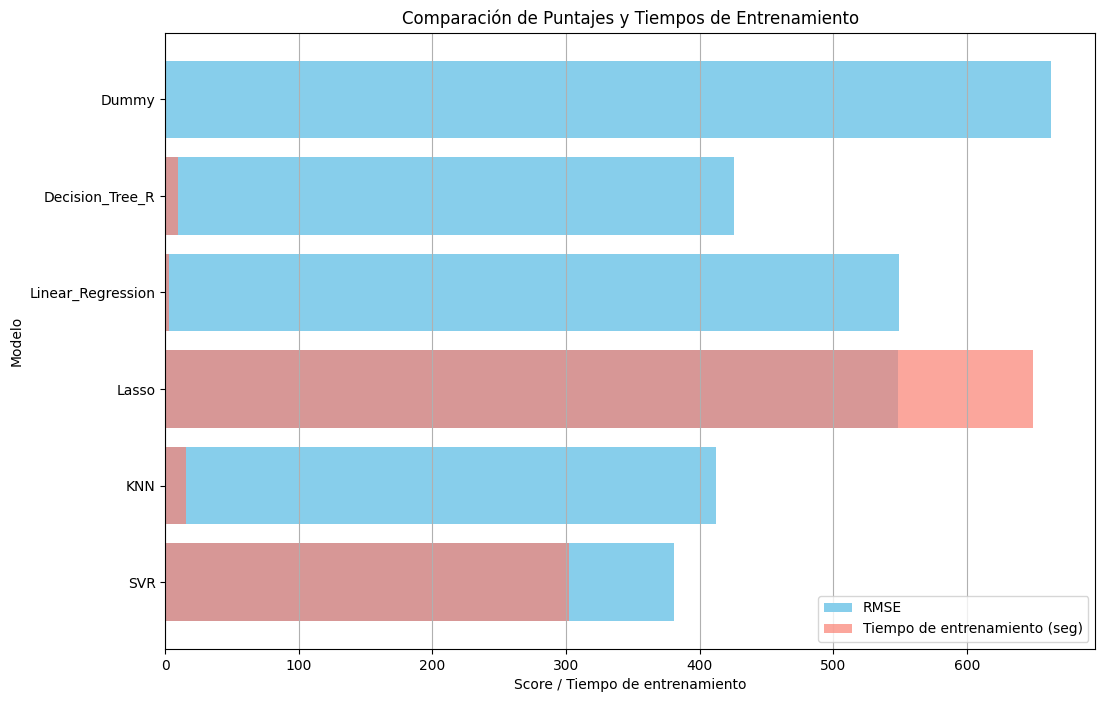

In [12]:
# Datos de resultados "hardcodeados" descomentar esta linea y comentar la otra definición en caso de no 
# querer ejecutar todos los modelos
#results = {"Dummy": [663, 0.087], "Decision_Tree_R": [425, 19.37], "Linear_Regression": [549, 0.38], "Lasso": [566, 27.60], "KNN": [412, 30.78], "SVR": [380, 266.75]}

results = graph_data
#### Graficas generadas por ChatGPT ####

# Extraer nombres de modelos y puntajes
modelos = list(results.keys())
scores = [score[0] for score in results.values()]
tiempos = [tiempo[1] for tiempo in results.values()]

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))

# Barra para los puntajes (RMSE)
plt.barh(modelos, scores, color='skyblue', label='RMSE')

# Barra para los tiempos de entrenamiento
plt.barh(modelos, tiempos, color='salmon', alpha=0.7, label='Tiempo de entrenamiento (seg)')

# Etiquetas y título
plt.xlabel('Score / Tiempo de entrenamiento')
plt.ylabel('Modelo')
plt.title('Comparación de Puntajes y Tiempos de Entrenamiento')
plt.legend()

# Mostrar gráfico
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar el mejor modelo arriba
plt.grid(axis='x')  # Añadir rejilla solo en el eje x para mayor claridad
plt.show()


Y por último, vamos a preparar el modelo final para la competición:

In [14]:
"""
Al final el modelo seleccionado es el SVR, la variante para problemas de regresión de SVM, este tipo de modelos se basan en maquinas de soporte vectorial cuyo objetivo es minimizar la suma de la diferencia entre las predicciones y los valores reales.
"""
pipe = Pipeline([
    ('scaler', PowerTransformer()),
    ('model', SVR(C=719, degree=1, epsilon=0.1, gamma='auto', kernel='rbf'))
])


pipe.fit(X_train, y_train)

y_pred_pipe = pipe.predict(X_test)

rmse_pipe = np.sqrt(mean_squared_error(y_test, y_pred_pipe))
print("RMSE:", rmse_pipe)

final_pipe = Pipeline([
    ('scaler', PowerTransformer()),
    ('model', SVR(C=719, degree=1, epsilon=0.1, gamma='auto', kernel='rbf'))
])

final_pipe.fit(X, y)

# Save the model to a file
dump(final_pipe, 'mejor_modelo.joblib')

/Users/edu/Documents/AA/.venv/lib/python3.12/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


RMSE: 384.2528287789927


/Users/edu/Documents/AA/.venv/lib/python3.12/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


['mejor_modelo.joblib']

# Uso de ChatGPT en esta parte:


Como bien está comentado en el código, ChatGPT se usó para generar la gráfica que muestra los tiempos de ejecución y las scorings de todos los modelos.
